In [68]:
# ------------------------------------------------------------
# Northwestern University 
# Predict 422
# Author Conor Campbell
# -------------------------------------------------------------
# S1 Run SetUp Script to Install Packages 
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import matplotlib.cbook as cbook
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

%matplotlib inline 

#S2 Establish working directory
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/My Drive/MSDS 422
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/MSDS 422" # change the file name as necessary for each assignment
!pwd

train = pd.read_csv(work_dir+'/train-2.csv', sep = ',') # change the file name as necessary for each assignment
!pwd

[Errno 2] No such file or directory: '/content/gdrive/My Drive/My Drive/MSDS 422'
/content
/content
gdrive	sample_data
Working Directory
/content
/content
/content


In [70]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
test = pd.read_csv(work_dir+'/test.csv', sep = ',')

In [72]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
target_var = train.iloc[:,1:]
independent_var = train.iloc[:,0]

In [74]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

In [75]:
independent_var.value_counts().sort_index()

# Here we count the number of each integer present in our MNIST Data Set

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(target_var, independent_var, test_size=0.3, random_state=0)

In [77]:
print(X_train.shape)
print(X_test.shape)

(29400, 784)
(12600, 784)


In [78]:
rforest =RandomForestClassifier(n_estimators=100)
rforest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
rforest_pred =rforest.predict(X_test)

print ("Classification Report")
print(classification_report(y_test, rforest_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, rforest_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1242
           1       0.99      0.98      0.98      1429
           2       0.96      0.97      0.96      1276
           3       0.95      0.94      0.95      1298
           4       0.97      0.97      0.97      1236
           5       0.96      0.96      0.96      1119
           6       0.97      0.98      0.98      1243
           7       0.97      0.95      0.96      1334
           8       0.95      0.94      0.94      1204
           9       0.93      0.94      0.93      1219

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

Confusion Matrix
[[1216    0    1    1    2    2    8    0   12    0]
 [   0 1404    9    5    3    1    4    0    3    0]
 [   7    0 1237    6    5    1    3    9    7    1]
 [   5    1   14 1222    0   16    2   14  

In [80]:
%%time

rforest_cv = RandomForestClassifier(n_estimators=100)
rforest_cv.fit(target_var, independent_var)
cv_result = cross_val_score(rforest_cv, target_var, independent_var)
print (np.mean(cv_result))

0.9636904761904763
CPU times: user 2min 39s, sys: 307 ms, total: 2min 39s
Wall time: 2min 39s


In [102]:
pred=rforest.predict(test)
test["label"] = pred

In [103]:
rf_test_pred = pd.DataFrame(pred, columns= {"label"})
result = pd.concat([pd.Series(range(1,28001),name = "ImageID"),rf_test_pred],axis=1)

In [104]:
result

,ImageID,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [84]:
result.to_csv(r'/content/gdrive/My Drive/MSDS 422/MNIST_rforest.csv', index = False)

In [85]:
print("Kaggle Score : 0.96235\nUser ID : Conor Campbell\nSubmission Name: MNIST_rforest.csv\nTime: 2 minutes and 46 seconds")

Kaggle Score : 0.96235
User ID : Conor Campbell
Submission Name: MNIST_rforest.csv
Time: 2 minutes and 46 seconds


## 2 : Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

In [90]:
from sklearn.decomposition import PCA 

In [109]:
label = test['label']
test.drop(labels=['label'], axis=1,inplace = True)
test.insert(0, 'label', label)
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
full_data = pd.concat([train, test], axis=0)

In [116]:
target_var2 = full_data.iloc[:,1:]
independent_var2 = full_data.iloc[:,0]

In [117]:
independent_var2.value_counts().sort_index()

0    6923
1    7876
2    7006
3    7124
4    6833
5    6299
6    6911
7    7270
8    6785
9    6973
Name: label, dtype: int64

In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(target_var2, independent_var2, test_size=0.3, random_state=0)

In [119]:
print(X_train2.shape)
print(X_test2.shape)

(49000, 784)
(21000, 784)


In [120]:
%%time
pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X_train2)
X_test_reduced = pca.fit_transform(X_test2)



CPU times: user 26.2 s, sys: 1.66 s, total: 27.9 s
Wall time: 14.7 s


In [121]:
X_reduced

array([[ 1067.79837335,  -629.10078719,   102.39047792, ...,
           -1.70489831,    16.52968701,    47.61040908],
       [  957.37177631,   253.95568091,   903.14067994, ...,
           40.21619564,   -37.75995139,    20.62805109],
       [  185.61342748,  1051.36535563,    60.52625969, ...,
           72.71627723,   -18.08823193,    18.00271929],
       ...,
       [  272.55468201, -1010.07319098,  -187.58273576, ...,
          -11.30015246,     2.32459847,    56.46865461],
       [ -671.33998366,    63.87781258,    37.20628135, ...,
           27.13541341,   -22.40984124,    12.4920167 ],
       [  244.19120201,  -234.15245912,   605.7295471 , ...,
           47.46994262,   -55.45507675,     1.40948437]])

In [122]:
# Here we print the result to see how many variables we have after conducting PCA
print(X_train2.shape)
print(X_reduced.shape)
print(X_test2.shape)
print(X_test_reduced.shape)
print("We can see here that the number of variables decreased from 784 to 154 for our training set")

(49000, 784)
(49000, 154)
(21000, 784)
(21000, 153)
We can see here that the number of variables decreased from 784 to 154 for our training set


In [123]:
%%time

rforest_cv2 = RandomForestClassifier(n_estimators=154)
rforest_cv2.fit(X_reduced, y_train2)
cv_result2 = cross_val_score(rforest_cv2, X_reduced, y_train2)
print (np.mean(cv_result2))

0.9487551020408163
CPU times: user 11min 32s, sys: 1.05 s, total: 11min 33s
Wall time: 11min 35s


### After running a PCA on the entire data set, we ran a CV on the 154 estimators and determined we were predicting the labels with 94.9% accuracy

Text(0.5, 1.0, 'PCA - Explained Variance Ratio')

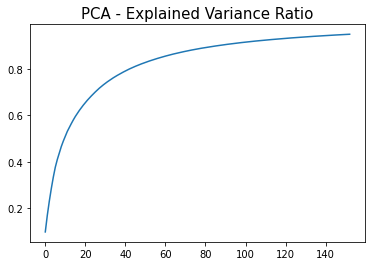

In [124]:
var = pca.explained_variance_ratio_.cumsum()
plt.plot(var)
plt.title("PCA - Explained Variance Ratio", fontsize=15)

## 3 : Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [125]:
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
target_var3 = test.iloc[:,1:]
independent_var3 = test.iloc[:,0]

In [127]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(target_var3, independent_var3, test_size=0.3, random_state=0)

In [128]:
print(X_train3.shape)
print(X_test3.shape)

(19600, 784)
(8400, 784)


In [129]:
X_reduced2 = pca.fit_transform(X_train3)
X_test_reduced2 = pca.fit_transform(X_test3)

In [130]:
print(X_train3.shape)
print(X_reduced2.shape)

(19600, 784)
(19600, 153)


In [131]:
rforest2 =RandomForestClassifier(n_estimators=154)
rforest2.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=154,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
rforest_pred2 =rforest2.predict(X_test3)

print ("Classification Report")
print(classification_report(y_test3, rforest_pred2))

print("Confusion Matrix")
print(confusion_matrix(y_test3, rforest_pred2))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       878
           1       0.99      0.99      0.99       968
           2       0.97      0.98      0.98       874
           3       0.97      0.97      0.97       829
           4       0.97      0.98      0.97       866
           5       0.98      0.97      0.97       733
           6       0.98      0.99      0.99       794
           7       0.98      0.99      0.99       835
           8       0.96      0.96      0.96       792
           9       0.97      0.97      0.97       831

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400

Confusion Matrix
[[869   0   0   3   0   1   2   1   2   0]
 [  0 959   2   0   0   1   0   1   4   1]
 [  2   0 856   1   1   0   3   2   8   1]
 [  2   2  10 800   0   6   0   3   4   2]
 [  1   1   1   0 845   1   2 

In [133]:
%%time

rforest_cv3 = RandomForestClassifier(n_estimators=154)
rforest_cv3.fit(X_reduced2, y_train3)
cv_result3 = cross_val_score(rforest_cv3, X_reduced2, y_train3)
print (np.mean(cv_result3))

0.9412755102040815
CPU times: user 3min 38s, sys: 220 ms, total: 3min 38s
Wall time: 3min 39s


In [134]:
test.drop(labels=['label'], axis=1,inplace = True)

In [135]:
pred=rforest2.predict(test)

In [136]:
rf_test_pred2 = pd.DataFrame(pred, columns= {"Label"})
result2 = pd.concat([pd.Series(range(1,28001),name = "ImageID"),rf_test_pred2],axis=1)

In [137]:
result2

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [138]:
result2.to_csv(r'/content/gdrive/My Drive/MSDS 422/MNIST_rforest2.csv', index = False)

In [139]:
print("Kaggle Score : 0.95960\nUser ID : Conor Campbell\nSubmission Name: MNIST_rforest2.csv\nTime: 3 minutes and 41 seconds")

Kaggle Score : 0.95960
User ID : Conor Campbell
Submission Name: MNIST_rforest2.csv
Time: 3 minutes and 41 seconds


## Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

## The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. Provide your Kaggle.com score and user ID.

In [140]:
pca = PCA(n_components=0.95)

total_reduced = pca.fit_transform(full_data)

print(total_reduced.shape)

(70000, 154)


#### The major flaw with our design was that we performed PCA on the entire data set, as oppossed to separately on the testing and training sets. 

In [141]:
target_var4 = train.iloc[:,1:]
independent_var4 = train.iloc[:,0]

In [142]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(target_var4, independent_var4, test_size=0.3, random_state=0)

In [143]:
print(X_train4.shape)
print(X_test4.shape)

(29400, 784)
(12600, 784)


In [144]:
X_reduced4 = pca.fit_transform(X_train4)
X_test_reduced4 = pca.fit_transform(X_test4)

In [145]:
print(X_train4.shape)
print(X_reduced4.shape)

(29400, 784)
(29400, 153)


In [146]:
%%time

rforest4 =RandomForestClassifier(n_estimators=153)
rforest4.fit(X_train4,y_train4)

CPU times: user 33.7 s, sys: 74.9 ms, total: 33.8 s
Wall time: 33.9 s


In [147]:
rforest_pred4 =rforest4.predict(X_test4)

print ("Classification Report")
print(classification_report(y_test4, rforest_pred4))

print("Confusion Matrix")
print(confusion_matrix(y_test4, rforest_pred4))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1242
           1       0.99      0.98      0.98      1429
           2       0.95      0.96      0.96      1276
           3       0.96      0.94      0.95      1298
           4       0.97      0.96      0.97      1236
           5       0.96      0.97      0.96      1119
           6       0.97      0.98      0.97      1243
           7       0.97      0.95      0.96      1334
           8       0.95      0.95      0.95      1204
           9       0.93      0.94      0.94      1219

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

Confusion Matrix
[[1217    0    0    1    3    3    7    0   10    1]
 [   0 1402   12    4    2    1    5    0    3    0]
 [   7    1 1229    8    5    1    5    9    9    2]
 [   2    0   17 1225    0   15    3   12  

In [151]:
%%time

rforest_cv4 = RandomForestClassifier(n_estimators=153)
rforest_cv4.fit(X_reduced4, y_train4)
cv_result4 = cross_val_score(rforest_cv4, X_reduced4, y_train4)
print (np.mean(cv_result4))

0.937891156462585
CPU times: user 6min 4s, sys: 340 ms, total: 6min 4s
Wall time: 6min 5s


In [152]:
train.drop(labels=['label'], axis=1,inplace = True)

In [153]:
pred4=rforest4.predict(train)

In [154]:
train["label"] = pred4

In [155]:
rf_test_pred4 = pd.DataFrame(pred4, columns= {"Label"})
result4 = pd.concat([pd.Series(range(1,42001),name = "ImageID"),rf_test_pred4],axis=1)

In [156]:
result4

,ImageID,Label
0,1,1
1,2,0
2,3,1
3,4,4
4,5,0
...,...,...
41995,41996,0
41996,41997,1
41997,41998,7
41998,41999,6


In [157]:
result4.to_csv(r'/content/gdrive/My Drive/MSDS 422/MNIST_trainpca.csv', index = False)

In [158]:
target_var5 = test.iloc[:,1:]
independent_var5 = test.iloc[:,0]

In [159]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(target_var5, independent_var5, test_size=0.3, random_state=0)

In [160]:
print(X_train5.shape)
print(X_test5.shape)

(19600, 783)
(8400, 783)


In [161]:
X_reduced5 = pca.fit_transform(X_train5)
X_test_reduced5 = pca.fit_transform(X_test5)

In [162]:
print(X_train5.shape)
print(X_reduced5.shape)

(19600, 783)
(19600, 153)


In [166]:
pred5=rforest4.predict(test)

In [167]:
test["label"] = pred5

In [168]:
rf_test_pred5 = pd.DataFrame(pred5, columns= {"Label"})
result5 = pd.concat([pd.Series(range(1,28001),name = "ImageID"),rf_test_pred5],axis=1)

In [169]:
result5

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [171]:
result5.to_csv(r'/content/gdrive/My Drive/MSDS 422/MNIST_testpca.csv', index = False)

In [ ]:
print("Kaggle Score : 0.95960\nUser ID : Conor Campbell\nSubmission Name: MNIST_testpca.csv\nTime: 3 minutes and 40 seconds")

## 6 : Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdfPreview the document

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
fig.show()

In [ ]:
X = x_train.reshape(len(x_train),-1)
Y = y_train

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

kmeans = MiniBatchKMeans(n_clusters = n_digits)

kmeans.fit(X)

In [ ]:
kmeans.labels_

In [ ]:

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [ ]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

In [ ]:

from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [ ]:
clusters = [10, 16, 36, 64, 144, 256]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

In [ ]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))